In [1]:
from astropy.io import fits
from scipy import *
import numpy as np
import WLanalysis

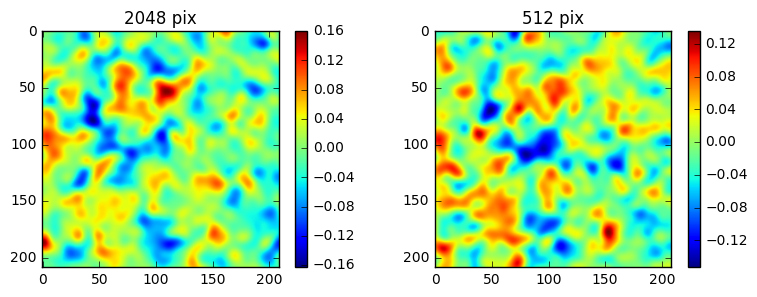

In [13]:
kappa_2048=fits.open('/Users/jia/weaklensing/PDF/fidu_111_2048.fits')[0].data
kappa_512=fits.open('/Users/jia/weaklensing/PDF/fidu_111_512.fits')[0].data
f, (ax1,ax2) = subplots(1,2,figsize=(8,3))
cb1=ax1.imshow(WLanalysis.smooth(kappa_2048,5))
cb2=ax2.imshow(WLanalysis.smooth(kappa_512,5))
ax1.set_title('2048 pix')
ax2.set_title('512 pix')
colorbar(cb1,ax=ax1)
colorbar(cb2,ax=ax2)
plt.tight_layout()
show()

In [14]:
ell1, ps1 = WLanalysis.PowerSpectrum(kappa_2048)
ell2, ps2 = WLanalysis.PowerSpectrum(kappa_512)

/Users/jia/Documents/code/WLanalysis/WLanalysis.py:527: RuntimeWarning: invalid value encountered in divide
  radial_prof = tbin/hist_ind[1:]


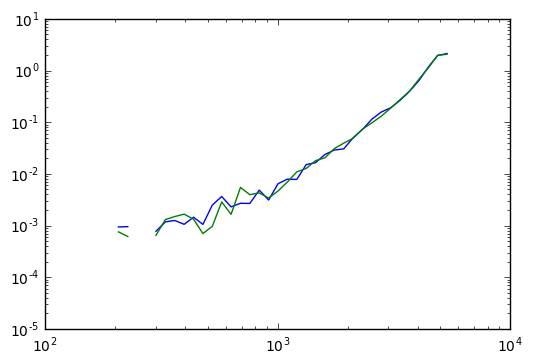

In [17]:
loglog(ell1,ps1)
loglog(ell2,ps2)
xlim(100,1e4)
show()

In [29]:
TTdir = '/Users/jia/weaklensing/PDF/stats/output_tt_3000_s4/seed0/'
EBdir = '/Users/jia/weaklensing/PDF/stats/output_eb_5000_s4/seed0/'
z_arr=arange(0.5,3,0.5)
PTTcross = array([load(TTdir+'ALL_galXcmb_z%.1f.npy'%(iz)) for iz in z_arr])
PEBcross = array([load(EBdir+'ALL_galXcmb_z%.1f.npy'%(iz)) for iz in z_arr])
Picross = array([load(EBdir+'ALL_igalXicmb_z%.1f.npy'%(iz)) for iz in z_arr])

PTT_std = std(PTTcross,axis=1)*sqrt(12.25/2e4)
PTT_mean = mean(PTTcross,axis=1) 
PEB_std = std(PEBcross,axis=1)*sqrt(12.25/2e4)
PEB_mean = mean(PEBcross,axis=1)
Pi_std = std(Picross,axis=1)*sqrt(12.25/2e4)
Pi_mean = mean(Picross,axis=1)

In [25]:
ellTT=load(TTdir+'ALL_power_1d_lbin_edges.npy')
ellEB=load(EBdir+'ALL_power_1d_lbin_edges.npy')

In [91]:
ell =  WLanalysis.edge2center(linspace(100, 5000, 21))
Picross.shape, PTTcross.shape
print ellTT, ellEB

[  100.   345.   590.   835.  1080.  1325.  1570.  1815.  2060.  2305.
  2550.  2795.  3040.  3285.  3530.  3775.  4020.  4265.  4510.  4755.
  5000.] [  100.   345.   590.   835.  1080.  1325.  1570.  1815.  2060.  2305.
  2550.  2795.  3040.  3285.  3530.  3775.  4020.  4265.  4510.  4755.
  5000.]


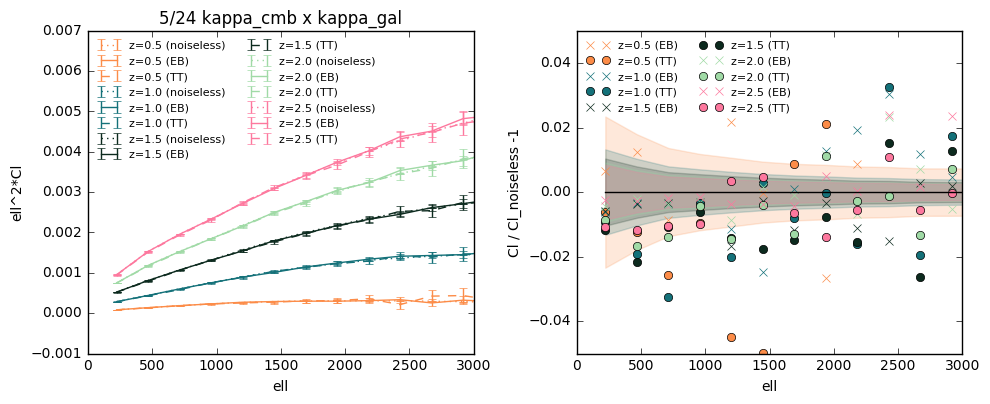

In [94]:
f, (ax1,ax2) = subplots(1,2,figsize=(10,4))

seed(45)
for i, iz in enumerate(z_arr):
#     print i, iz
    icolor=rand(3)
    ax1.errorbar(ell, Pi_mean[i]*ell**2, Pi_std[i]*ell**2,color=icolor,fmt=':',label='z=%s (noiseless)'%(iz))
    ax1.errorbar(ell, PEB_mean[i]*ell**2, PEB_std[i]*ell**2,color=icolor,fmt='-',label='z=%s (EB)'%(iz))
    ax1.errorbar(ell, PTT_mean[i]*ell**2, PTT_std[i]*ell**2,color=icolor,fmt='--',label='z=%s (TT)'%(iz))
    ax2.plot(ell, PEB_mean[i]/Pi_mean[i]-1,'x',color=icolor,label='z=%s (EB)'%(iz))
    ax2.plot(ell, PTT_mean[i]/Pi_mean[i]-1,'o',color=icolor,label='z=%s (TT)'%(iz))
    ax2.fill_between(ell, -Pi_std[i]/Pi_mean[i],Pi_std[i]/Pi_mean[i],color=icolor,alpha=0.2)
ax2.plot(ell, zeros(20),'k')

ax2.set_ylim(-0.05, 0.05)  
ax1.set_xlabel('ell')
ax1.set_ylabel('ell^2*Cl')
ax2.set_xlabel('ell')
ax2.set_ylabel('Cl / Cl_noiseless -1')
ax1.set_xlim(0,3000)
ax2.set_xlim(0,3000)
ax1.legend(fontsize=8,frameon=0,loc='best',ncol=2)
ax2.legend(fontsize=8,frameon=0,loc='best',ncol=2)
plt.tight_layout()
ax1.set_title('5/24 kappa_cmb x kappa_gal' )
show()

In [8]:
import pickle

In [9]:
a=pickle.load(open(TTdir+'ALL_igalXicmb_pdf_z2.0_sg1.0_sc5.0_bin_edges.pkl','rb'))

In [82]:
print sqrt(sum( ((PEB_mean - Pi_mean)**2/PEB_std**2)[:, where(ell<3000)[0]]))
print sqrt(sum( ((PTT_mean - Pi_mean)**2/PTT_std**2)[:, where(ell<2000)[0]]))

3.26121969552
3.8565265172


In [70]:
PTT_mean[:, where(ell<2000)[0]].shape

(5, 8)

In [90]:
print mean(PEB_mean/Pi_mean-1,axis=1)
print mean( (PTT_mean/Pi_mean)[:, where(ell<3000)[0]]-1,axis=1)

[ 0.14440008  0.0125161   0.00202034 -0.00052235  0.00146197]
[ 0.05855223 -0.00627773 -0.00989181 -0.0061805  -0.00464652]
